# Part A

### Importing Libraries

In [1]:
%matplotlib inline

# Importing all basic libraries
import numpy as np
import random
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from collections import Counter

# pre-processing method
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Activation
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

### Answer 1 A

###### Read the ‘Signals.csv’ as DataFrame and import required libraries

In [339]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [376]:
signal=pd.read_csv('/content/drive/MyDrive/Great Learning_AI_ML course/Intro to Neural network Project/Part-+1%2C2%263+-+Signal.csv')

In [341]:
signal.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
signal.shape

(1599, 12)

In [6]:
signal.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

In [7]:
signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Answer 1 B

###### Check for missing values and print percentage for each attribute.

In [342]:
round(signal.isnull().sum() / signal.isnull().count() * 100, 2)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

From above, it's evident we don't have missing values in the dataset


In [9]:
signal.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
signal.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

In [12]:
signal.describe(include='all')

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Answer 1 C

###### Check for presence of duplicate records in the dataset and impute with appropriate method

In [345]:
signal['Signal_Strength'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64

In [346]:
signal.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [347]:
signal.duplicated().sum()

240

In [348]:
signal=signal.drop_duplicates()

In [349]:
signal.shape

(1359, 12)

In [350]:
signal['Signal_Strength'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

### Answer 1 D

###### Visualise distribution of the target variable

In [351]:
signal['Signal_Strength'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

In [352]:
signal.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
Parameter 2,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
Parameter 3,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
Parameter 4,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
Parameter 5,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
Parameter 6,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
Parameter 7,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
Parameter 8,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
Parameter 9,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
Parameter 10,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [20]:
signal.nunique()

Parameter 1         96
Parameter 2        143
Parameter 3         80
Parameter 4         91
Parameter 5        153
Parameter 6         60
Parameter 7        144
Parameter 8        436
Parameter 9         89
Parameter 10        96
Parameter 11        65
Signal_Strength      6
dtype: int64

<Axes: xlabel='Signal_Strength'>

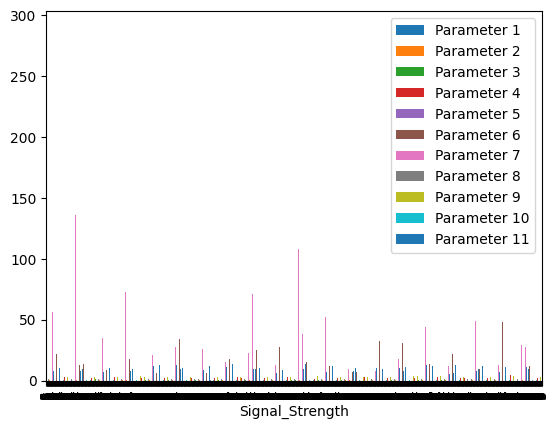

In [21]:
signal.plot('Signal_Strength',kind='bar')

<Axes: >

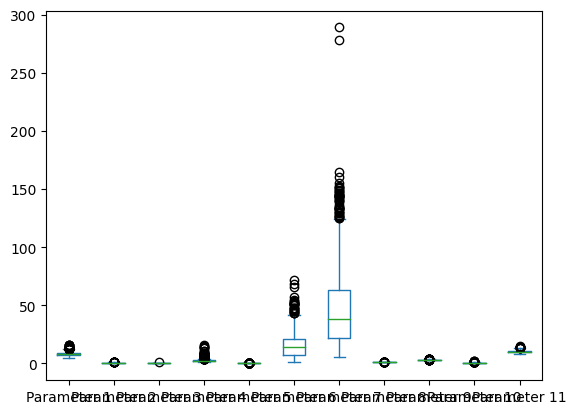

In [22]:
signal.plot('Signal_Strength',kind='box')

<Axes: ylabel='Frequency'>

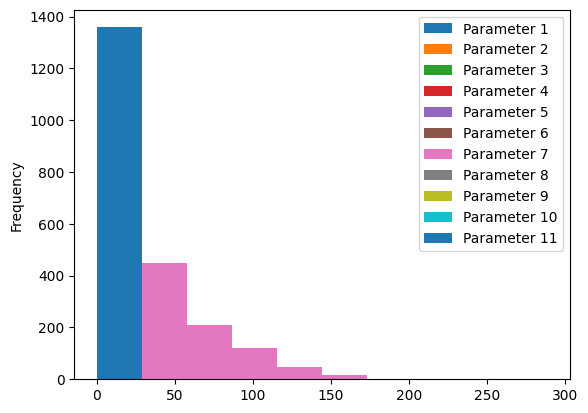

In [23]:
signal.plot('Signal_Strength',kind='hist')

In [24]:
signal['Signal_Strength'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64


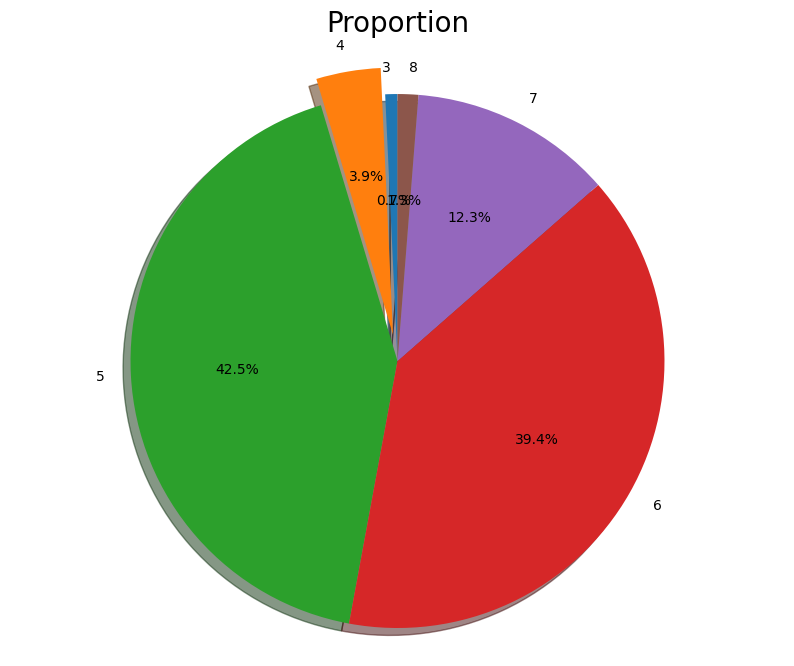

In [25]:
print(signal.Signal_Strength.value_counts())
labels = '3', '4','5','6','7','8'
#sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [signal.Signal_Strength[signal['Signal_Strength']==3].count(),signal.Signal_Strength[signal['Signal_Strength']==4].count(),
         signal.Signal_Strength[signal['Signal_Strength']==5].count(),signal.Signal_Strength[signal['Signal_Strength']==6].count(),
         signal.Signal_Strength[signal['Signal_Strength']==7].count(),signal.Signal_Strength[signal['Signal_Strength']==8].count()]
explode = (0, 0.1,0,0,0,0)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

### Answer 1 E

###### Share insights from the initial data analysis (at least 2).

1. From above pie chart, it's evident that signal strength of '5'  is most prominent (percentage 42.5%) followed by '6' (percentage 39.4%).
2. Signal strength '3'  is the least occurring strength type (percentage 0.73%)

### Answer 2 A

###### Split the data into X & Y.

In [377]:
## Separating Independent and Dependent Columns
X = signal.drop(['Signal_Strength'],axis=1)
Y = signal[['Signal_Strength']]

In [378]:
Y.head()

,Signal_Strength
0,5
1,5
2,5
3,6
4,5


In [379]:
X.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Answer 2 B

###### Split the data into train & test with 70:30 proportion

In [394]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42,stratify = Y)

### Answer 2 C

###### Print shape of all the 4 variables and verify if train and test data is in sync

In [381]:
X_train.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
1292,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.4
932,7.6,0.400,0.29,1.9,0.078,29.0,66.0,0.99710,3.45,0.59,9.5
510,12.4,0.420,0.49,4.6,0.073,19.0,43.0,0.99780,3.02,0.61,9.5
146,5.8,0.680,0.02,1.8,0.087,21.0,94.0,0.99440,3.54,0.52,10.0
928,8.6,0.470,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.2


In [357]:
X_test.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
1397,7.3,0.59,0.26,2.0,0.080,17.0,104.0,0.99584,3.28,0.52,9.9
809,7.6,0.48,0.31,2.8,0.070,4.0,15.0,0.99693,3.22,0.55,10.3
1172,9.7,0.42,0.46,2.1,0.074,5.0,16.0,0.99649,3.27,0.74,12.3
323,10.3,0.59,0.42,2.8,0.090,35.0,73.0,0.99900,3.28,0.70,9.5
1538,6.2,0.64,0.09,2.5,0.081,15.0,26.0,0.99538,3.57,0.63,12.0


In [382]:
y_train.head()

,Signal_Strength
1292,6
932,6
510,5
146,5
928,5


In [383]:
y_test.head()

,Signal_Strength
416,6
749,6
1321,6
1064,6
659,4


In [384]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 11)
(480, 11)
(1119, 1)
(480, 1)


In [385]:
signal['Signal_Strength'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64

### Answer 2 D

###### Normalise the train and test data with appropriate method

In [395]:
X_train_norm.shape

(1119, 11)

In [397]:
X_train_norm.shape

(1119, 11)

In [396]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
X_train_norm = normalizer.fit_transform(X_train)
X_train_norm

array([[0.17110101, 0.01145507, 0.00377002, ..., 0.10498062, 0.01943011,
        0.35960212],
       [0.10378761, 0.00546251, 0.00396032, ..., 0.04711411, 0.0080572 ,
        0.12973452],
       [0.24869333, 0.00842348, 0.0098274 , ..., 0.06056886, 0.01223411,
        0.19053118],
       ...,
       [0.29039366, 0.00938867, 0.01266378, ..., 0.06681238, 0.01069871,
        0.19650699],
       [0.10148057, 0.00665625, 0.00283709, ..., 0.03535452, 0.00676537,
        0.10584532],
       [0.1618732 , 0.01998889, 0.00049052, ..., 0.08780395, 0.02182836,
        0.30167278]])

In [398]:
X_train_norm.shape

(1119, 11)

In [399]:
X_test_norm.shape

(480, 11)

In [400]:
X_test_norm = normalizer.transform(X_test)
X_test_norm

array([[0.39984359, 0.01810612, 0.0241415 , ..., 0.12297076, 0.02489592,
        0.44133679],
       [0.22109378, 0.01544628, 0.00545163, ..., 0.1066096 , 0.02210938,
        0.28772479],
       [0.09857787, 0.01458952, 0.        , ..., 0.07905945, 0.01163219,
        0.24644467],
       ...,
       [0.15561349, 0.00550149, 0.0064446 , ..., 0.05045649, 0.00785927,
        0.14932607],
       [0.10123653, 0.01232445, 0.00308111, ..., 0.05179202, 0.01056381,
        0.13547111],
       [0.39872082, 0.0214366 , 0.01543435, ..., 0.14019538, 0.03301237,
        0.46303063]])

In [401]:
X_test_norm.shape

(480, 11)

In [402]:
y_train.shape

(1119, 1)

In [403]:
y_test.shape

(480, 1)

### Answer 2 E

###### Transform Labels into format acceptable by Neural Network

In [405]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat=y_test
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [406]:
y_train.shape

(1119, 10)

In [407]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [408]:
y_test[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [409]:
y_test_cat[0:10]

,Signal_Strength
416,6
749,6
1321,6
1064,6
659,4
988,5
131,5
1427,5
1059,7
703,4


In [410]:
np.unique(y_test_cat)

array([3, 4, 5, 6, 7, 8])

### Answer 3 A

###### Design a Neural Network to train a classifier

In [411]:
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [412]:
modelx = tf.keras.models.Sequential()

In [420]:
# Initializing the ANN
modelx = tf.keras.models.Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
modelx.add(Dense(activation = 'relu', input_dim = 11, units=64))
#Add 1st hidden layer
modelx.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
modelx.add(Dense(10, activation = 'sigmoid'))

In [421]:
# Create optimizer with default learning rate
# Compile the model
modelx.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [422]:
modelx.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 3,178
Trainable params: 3,178
Non-trainable params: 0
_________________________________________________________________


### Answer 3 B

###### Train the classifier using previously designed Architecture

In [417]:
y_train[0:2]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [418]:
y_test[0:2]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [423]:
history=modelx.fit(X_train_norm, y_train,
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
28/28 [==============================] - 1s 9ms/step - loss: 2.2870 - accuracy: 0.0682 - val_loss: 2.1664 - val_accuracy: 0.3661
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 2.0819 - accuracy: 0.3911 - val_loss: 2.0012 - val_accuracy: 0.4107
Epoch 3/50
28/28 [==============================] - 0s 3ms/step - loss: 1.9168 - accuracy: 0.3944 - val_loss: 1.8390 - val_accuracy: 0.4107
Epoch 4/50
28/28 [==============================] - 0s 3ms/step - loss: 1.7484 - accuracy: 0.3966 - val_loss: 1.6768 - val_accuracy: 0.4107
Epoch 5/50
28/28 [==============================] - 0s 3ms/step - loss: 1.5860 - accuracy: 0.3966 - val_loss: 1.5331 - val_accuracy: 0.4107
Epoch 6/50
28/28 [==============================] - 0s 3ms/step - loss: 1.4508 - accuracy: 0.3966 - val_loss: 1.4282 - val_accuracy: 0.4062
Epoch 7/50
28/28 [==============================] - 0s 3ms/step - loss: 1.3566 - accuracy: 0.3978 - val_loss: 1.3634 - val_accuracy: 0.4018
Epoch 8/50
28/28 [==

In [425]:
y_pred=modelx.predict(X_test)

15/15 [==============================] - 0s 3ms/step


In [426]:
y_test.shape

(480, 10)

In [427]:
y_pred.shape

(480, 10)

### Answer 3 C

###### Plot 2 separate visuals. [3 Marks]

Training Loss and Validation Loss

15/15 [==============================] - 0s 2ms/step - loss: 7.3060 - accuracy: 0.4708


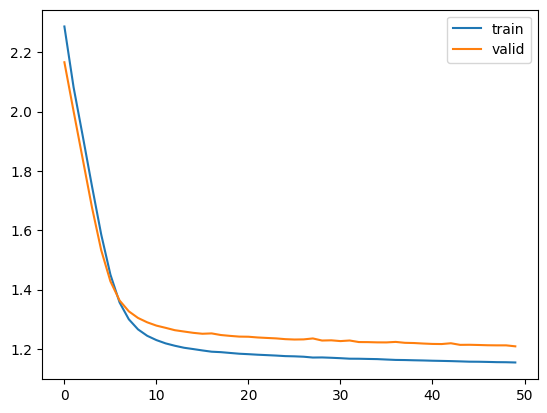

In [430]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting losses at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = modelx.evaluate(X_test, y_test)

Training Accuracy and Validation Accuracy

15/15 [==============================] - 0s 4ms/step - loss: 7.3060 - accuracy: 0.4708


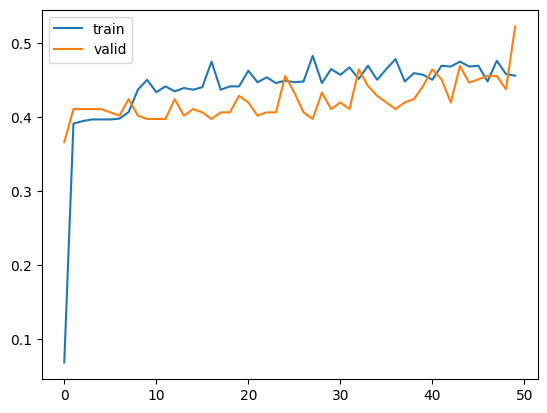

In [431]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = modelx.evaluate(X_test, y_test)

### Answer 3 D

###### Design new architecture/update existing architecture in attempt to improve the performance of the model

In [50]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [51]:
X_train.shape[1]

11

In [432]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(10, activation = 'softmax'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [433]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               3072      
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 46,634
Trainable params: 46,634
Non-trainable params: 0
_________________________________________________________________


In [434]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
14/14 [==============================] - 1s 22ms/step - loss: 5.1158 - accuracy: 0.3575 - val_loss: 2.2853 - val_accuracy: 0.4464
Epoch 2/50
14/14 [==============================] - 0s 6ms/step - loss: 1.5397 - accuracy: 0.4536 - val_loss: 1.5946 - val_accuracy: 0.4062
Epoch 3/50
14/14 [==============================] - 0s 7ms/step - loss: 1.2752 - accuracy: 0.4771 - val_loss: 1.6589 - val_accuracy: 0.4911
Epoch 4/50
14/14 [==============================] - 0s 7ms/step - loss: 1.2872 - accuracy: 0.4570 - val_loss: 1.4959 - val_accuracy: 0.4911
Epoch 5/50
14/14 [==============================] - 0s 5ms/step - loss: 1.1856 - accuracy: 0.4939 - val_loss: 1.3474 - val_accuracy: 0.4821
Epoch 6/50
14/14 [==============================] - 0s 7ms/step - loss: 1.1062 - accuracy: 0.5140 - val_loss: 1.3188 - val_accuracy: 0.5000
Epoch 7/50
14/14 [==============================] - 0s 7ms/step - loss: 1.1056 - accuracy: 0.5218 - val_loss: 1.3054 - val_accuracy: 0.4821
Epoch 8/50
14/14 [=

### Answer 3 E

###### Plot visuals as in Q3.C and share insights about difference observed in both the models.

Training Loss and Validation Loss

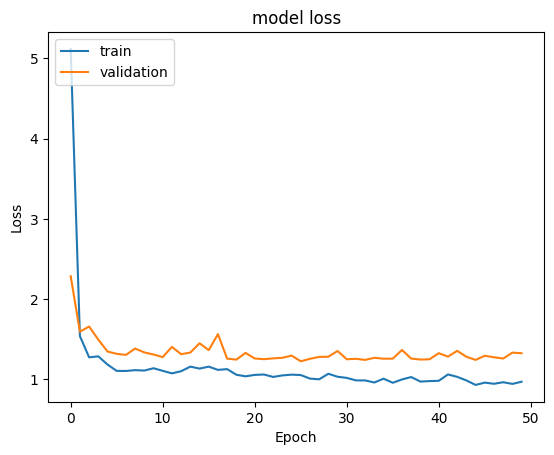

In [435]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Training Accuracy and Validation Accuracy

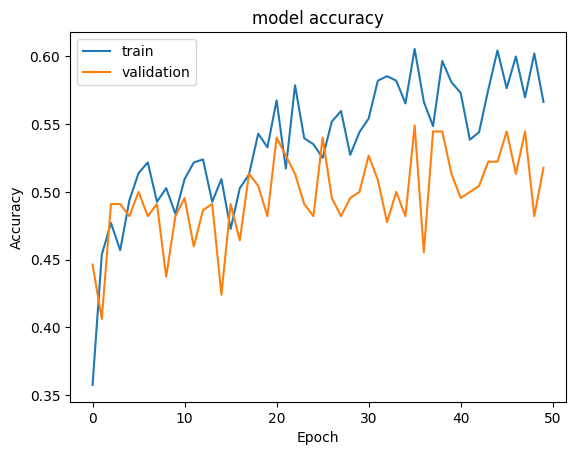

In [436]:
#Plotting Train Accuracy vs Validation Accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

1. From these model performance, we can say that current model performed better than previous model.
2. Accuracy in second model increased to 57% from 46% in first model. However, validation accuracy remained almost same at 52%

# Part B

### Answer 1 A

###### Read the .h5 file and assign to a variable.

In [314]:
import h5py
import numpy as np
file_path = "/content/drive/MyDrive/Great Learning_AI_ML course/Intro to Neural network Project/Autonomous_Vehicles_SVHN_single_grey1.h5"
f1 = h5py.File(file_path,'r+')

### Answer 1 B

###### Print all the keys from the .h5 file

In [257]:
f1.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

### Answer 1 C

###### Split the data into X_train, X_test, Y_train, Y_test

In [315]:
X_train = f1['X_train'][()]
y_train = f1['y_train'][()]
X_test = f1['X_test'][()]
y_test = f1['y_test'][()]
X_val = f1['X_val'][()]
y_val = f1['y_val'][()]

In [316]:
X_train.shape

(42000, 32, 32)

In [317]:
y_train.shape

(42000,)

### Answer 2 A

###### Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync

In [318]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(42000, 32, 32)
(18000, 32, 32)
(42000,)
(18000,)
(60000, 32, 32)
(60000,)


In [262]:
X_train.shape

(42000, 32, 32)

In [263]:
y_train

array([2, 6, 7, ..., 7, 0, 4], dtype=uint8)

In [264]:
y_train[0:10]

array([2, 6, 7, 4, 4, 0, 3, 0, 7, 3], dtype=uint8)

In [265]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Answer 2 B

###### Visualise first 10 images in train data and print its corresponding labels

In [266]:
import h5py
#f = h5py.File('the_file.h5', 'r')
one_data = f1['X_train']
print(one_data.shape)
print(one_data.dtype)
print(one_data)

(42000, 32, 32)
float32
<HDF5 dataset "X_train": shape (42000, 32, 32), type "<f4">


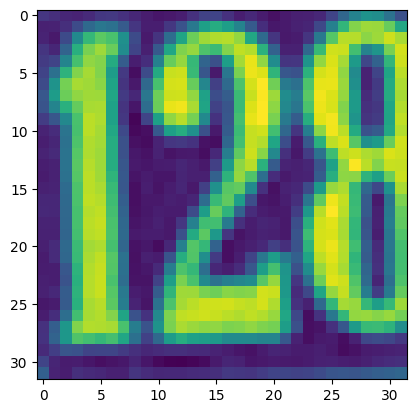

Label:  2


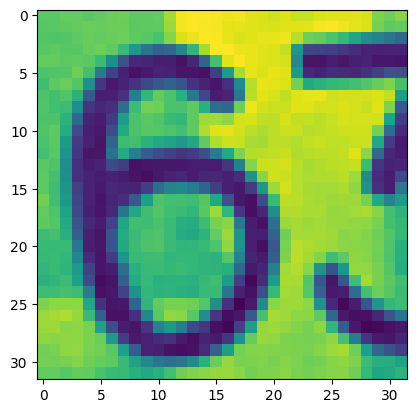

Label:  6


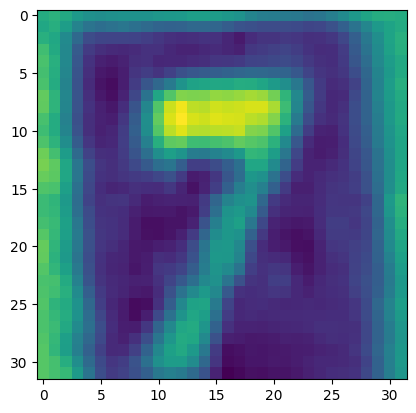

Label:  7


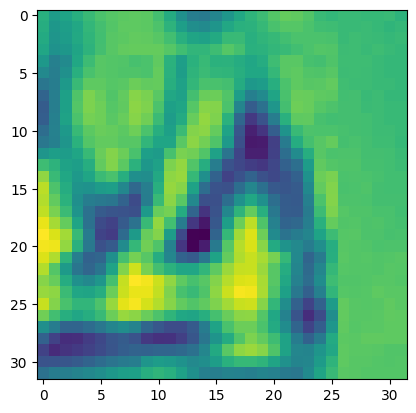

Label:  4


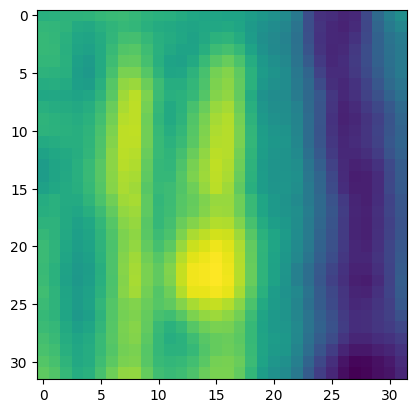

Label:  4


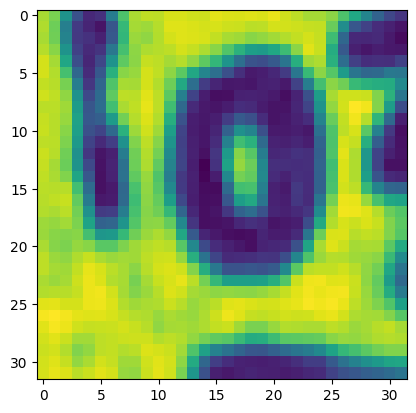

Label:  0


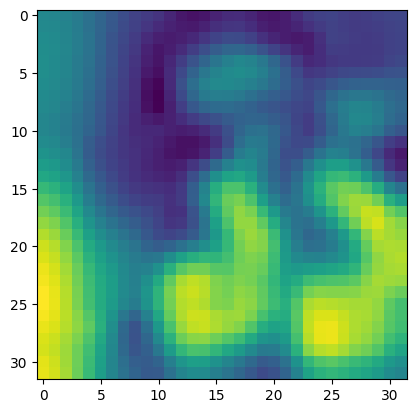

Label:  3


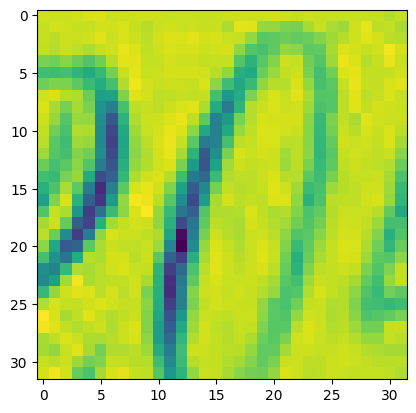

Label:  0


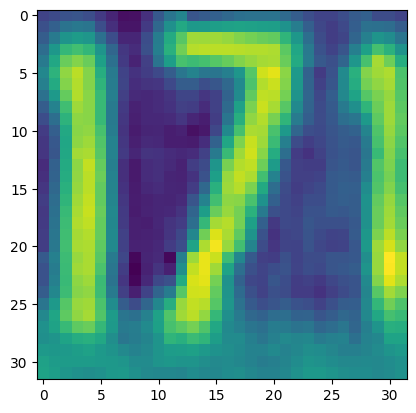

Label:  7


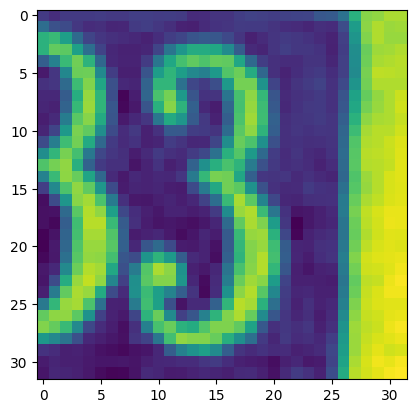

Label:  3


In [205]:
i=0
for i in range(10):
  plt.imshow(X_train[i])    # show first number in the dataset
  plt.show()
  print('Label: ', y_train[i])
  i=i+1

In [267]:
# printing first 10 labels
print('First 10 labels are: ', y_train[0:10])

First 10 labels are:  [2 6 7 4 4 0 3 0 7 3]


In [268]:
y_test[0:10]

array([1, 7, 2, 9, 0, 9, 1, 8, 4, 4], dtype=uint8)

In [269]:
print('First 10 examples are: ', X_train[0:10])

First 10 examples are:  [[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
  [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
  [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
  ...
  [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
  [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
  [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]

 [[ 86.9591  87.0685  88.3735 ...  91.8014  89.7477  92.5302]
  [ 86.688   86.9114  87.4337 ...  90.7306  87.204   88.5629]
  [ 85.9654  85.8145  85.9239 ...  63.8626  59.8199  54.8805]
  ...
  [ 90.2236  91.0448  93.4637 ...  55.3535  48.5822  44.0557]
  [ 90.6427  90.4039  90.937  ...  78.2696  77.4977  74.27  ]
  [ 88.0236  88.1977  86.6709 ...  75.2206  76.6396  79.2865]]

 [[123.125  125.8581 122.0757 ... 123.5747 124.1186 123.3144]
  [121.1683 124.1294 117.4613 ... 115.6078 119.5751 122.8306]
  [124.6132 121.1019 109.6623 ... 111.1783 119.7923 124.7595]
  ...
  [135.1391 127.3679 117

In [270]:
X_train.shape

(42000, 32, 32)

In [271]:
y_train.shape

(42000,)

### Answer 2 C

###### Reshape all the images with appropriate shape update the data in same variable

In [319]:
X_train=X_train.reshape(42000,32*32)

In [320]:
X_test=X_test.reshape(18000,32*32)

In [274]:
X_train

array([[ 33.0704,  30.2601,  26.852 , ...,  49.6682,  50.853 ,  53.0377],
       [ 86.9591,  87.0685,  88.3735, ...,  75.2206,  76.6396,  79.2865],
       [123.125 , 125.8581, 122.0757, ...,  93.9349, 104.7875, 113.8252],
       ...,
       [154.094 , 155.8057, 156.8164, ..., 135.1328, 136.6596, 137.6595],
       [207.4954, 208.4953, 213.0218, ..., 214.1357, 212.1359, 209.1362],
       [ 95.0784,  96.0783, 100.0779, ..., 138.0803, 140.493 , 140.493 ]],
      dtype=float32)

In [275]:
X_test

array([[ 40.558 ,  46.7917,  48.9764, ..., 110.0169, 111.2017, 114.1906],
       [115.1609, 114.161 , 113.1611, ...,  42.1388,  48.2522,  53.2517],
       [133.255 , 134.7279, 136.3148, ..., 128.1801, 127.8103, 128.2124],
       ...,
       [166.1898, 164.7169, 162.8311, ..., 162.902 , 162.788 , 162.674 ],
       [137.5778, 136.6919, 134.8061, ..., 144.7881, 142.7883, 141.7884],
       [ 30.182 ,  30.182 ,  30.182 , ...,  35.0891,  34.6762,  34.0892]],
      dtype=float32)

In [276]:
X_train.shape

(42000, 1024)

In [277]:
X_test.shape

(18000, 1024)

In [278]:
y_train.shape

(42000,)

In [279]:
y_test.shape

(18000,)

### Answer 2 D

###### Normalise the images i.e. Normalise the pixel values

In [321]:
print('Train', X_train.shape, y_train.shape)
print('Test', (X_test.shape, y_test.shape))

Train (42000, 1024) (42000,)
Test ((18000, 1024), (18000,))


In [322]:
print('Train', X_train.min(), X_train.max(), X_train.mean(), X_train.std())
print('Test', X_test.min(), X_test.max(), X_test.mean(), X_test.std())

Train 0.0 254.9745 112.2668 49.72814
Test 0.0 254.9745 112.64534 49.87732


We can see that all images are 32 by 32 pixels with a single channel for black-and-white images. There are 42,000 images for the training dataset and 18,000 for the test dataset.

We can also see that pixel values are integer values between 0 and 255 and that the mean and standard deviation of the pixel values are similar between the two datasets.

In [282]:
# # normalize inputs images from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [283]:
print('Training set', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)


### Answer 2 E

###### Transform Labels into format acceptable by Neural Network

In [284]:
y_train[0:2]

array([2, 6], dtype=uint8)

In [323]:
# One-hot-encoding of target labels so targets are ready for neural networks
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat=y_test
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


# converting y data into categorical (one-hot encoding)
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

In [286]:
y_train[0:2]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [287]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42000, 1024) (18000, 1024) (42000, 10) (18000, 10) (18000, 10)


In [288]:
y_train[0:2]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [289]:
y_train.shape

(42000, 10)

In [290]:
y_test_cat[0:3]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [291]:
y_test[:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [292]:
y_test.shape

(18000, 10)

In [293]:
y_train.shape

(42000, 10)

### Answer 2 F

###### Print total Number of classes in the Dataset

In [232]:
np.unique(y_train)

array([0., 1.], dtype=float32)

In [233]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

From above, we can see there are total 10 number of unique classes in dataset

### Answer 3 A

###### Design a Neural Network to train a classifier

In [234]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [294]:
model3 = Sequential()

In [296]:
model3.add(Dense(units = 50, input_shape = (1024,))) # glorot_uniform wt initializer by default
model3.add(Activation('sigmoid'))
model3.add(Dense(50))
model3.add(Activation('sigmoid'))
model3.add(Dense(50))
model3.add(Activation('sigmoid'))
model3.add(Dense(50))
model3.add(Activation('sigmoid'))
model3.add(Dense(10)) # 10 labels
model3.add(Activation('softmax'))

In [297]:
sgd = optimizers.SGD(lr = 0.01)
model3.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Answer 3 B

###### Train the classifier using previously designed Architecture (Use best suitable parameters).

In [298]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 50)                51250     
                                                                 
 activation_10 (Activation)  (None, 50)                0         
                                                                 
 dense_24 (Dense)            (None, 50)                2550      
                                                                 
 activation_11 (Activation)  (None, 50)                0         
                                                                 
 dense_25 (Dense)            (None, 50)                2550      
                                                                 
 activation_12 (Activation)  (None, 50)                0         
                                                                 
 dense_26 (Dense)            (None, 50)               

In [299]:
#y_test_cat[0:10]

In [242]:
y_test

array([1, 7, 2, ..., 7, 9, 2], dtype=uint8)

In [244]:
y_train[:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [246]:
X_train.shape

(42000, 1024)

In [247]:
y_train.shape

(42000, 10)

In [248]:
X_test.shape

(18000, 1024)

In [336]:
y_test.shape

(18000, 10)

In [335]:
y_test_cat.shape

(18000,)

In [300]:
history3 = model3.fit(X_train, y_train, batch_size = 128, validation_data=(X_test,y_test), epochs = 20, verbose = 1)

Epoch 1/20
329/329 [==============================] - 5s 10ms/step - loss: 2.3118 - accuracy: 0.0995 - val_loss: 2.3029 - val_accuracy: 0.0955
Epoch 2/20
329/329 [==============================] - 3s 9ms/step - loss: 2.3029 - accuracy: 0.1010 - val_loss: 2.3030 - val_accuracy: 0.1007
Epoch 3/20
329/329 [==============================] - 3s 9ms/step - loss: 2.3029 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1007
Epoch 4/20
329/329 [==============================] - 3s 8ms/step - loss: 2.3030 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1007
Epoch 5/20
329/329 [==============================] - 2s 7ms/step - loss: 2.3029 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 6/20
329/329 [==============================] - 2s 6ms/step - loss: 2.3029 - accuracy: 0.0993 - val_loss: 2.3030 - val_accuracy: 0.1002
Epoch 7/20
329/329 [==============================] - 2s 6ms/step - loss: 2.3030 - accuracy: 0.1001 - val_loss: 2.3030 - val_accuracy: 0.0982
Epoch

Creating a new model using new / best estimated parameters

In [301]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

image_size=32*32
num_classes=10
# create model
model2 = Sequential()

model2.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,))) ###Multiple Dense units with Relu activation
model2.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model2.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax is used

In [302]:
# Compile model
#RMS_prop=optimizers.RMSprop()   ## we can similarly use different optimizers like RMSprop, Adagrad and SGD
adam = optimizers.Adam(lr=1e-3)
model2.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

In [305]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 256)               262400    
                                                                 
 dense_34 (Dense)            (None, 64)                16448     
                                                                 
 dense_35 (Dense)            (None, 64)                4160      
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 10)                330       
                                                                 
Total params: 285,418
Trainable params: 285,418
Non-trainable params: 0
_________________________________________________________________


In [306]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [307]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [309]:
# Fit the model
history2=model2.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=128, verbose=2,callbacks=callbacks)

Epoch 1/50

Epoch 1: saving model to model_weights.h5
263/263 - 2s - loss: 1.7102 - accuracy: 0.4302 - val_loss: 1.7114 - val_accuracy: 0.4308 - lr: 1.0000e-05 - 2s/epoch - 9ms/step
Epoch 2/50

Epoch 2: saving model to model_weights.h5
263/263 - 2s - loss: 1.7027 - accuracy: 0.4336 - val_loss: 1.7037 - val_accuracy: 0.4301 - lr: 1.0000e-05 - 2s/epoch - 9ms/step
Epoch 3/50

Epoch 3: saving model to model_weights.h5
263/263 - 3s - loss: 1.6955 - accuracy: 0.4337 - val_loss: 1.6959 - val_accuracy: 0.4346 - lr: 1.0000e-05 - 3s/epoch - 10ms/step
Epoch 4/50

Epoch 4: saving model to model_weights.h5
263/263 - 3s - loss: 1.6883 - accuracy: 0.4371 - val_loss: 1.6893 - val_accuracy: 0.4357 - lr: 1.0000e-05 - 3s/epoch - 12ms/step
Epoch 5/50

Epoch 5: saving model to model_weights.h5
263/263 - 2s - loss: 1.6812 - accuracy: 0.4397 - val_loss: 1.6824 - val_accuracy: 0.4371 - lr: 1.0000e-05 - 2s/epoch - 8ms/step
Epoch 6/50

Epoch 6: saving model to model_weights.h5
263/263 - 2s - loss: 1.6747 - accu

### Answer 3 C

###### Evaluate performance of the model with appropriate metrics.

In [310]:
# predicting the model on test data
y_pred=model2.predict(X_test)


563/563 [==============================] - 1s 2ms/step


In [311]:
y_pred[0]

array([0.1458247 , 0.05529466, 0.09489127, 0.12799107, 0.03665247,
       0.15619823, 0.08175617, 0.06406708, 0.11886426, 0.11846   ],
      dtype=float32)

In [312]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

In [313]:
y_pred_final[0:10]

[5, 7, 2, 9, 0, 9, 0, 6, 1, 4]

In [325]:
y_test_cat[:10]

array([1, 7, 2, 9, 0, 9, 1, 8, 4, 4], dtype=uint8)

In [183]:
from sklearn.metrics import classification_report
print(classification_report(y_test_cat,y_pred_final))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1814
           1       0.73      0.81      0.77      1828
           2       0.80      0.78      0.79      1803
           3       0.71      0.72      0.71      1719
           4       0.79      0.80      0.79      1812
           5       0.72      0.72      0.72      1768
           6       0.77      0.74      0.75      1832
           7       0.80      0.80      0.80      1808
           8       0.76      0.70      0.73      1812
           9       0.74      0.74      0.74      1804

    accuracy                           0.76     18000
   macro avg       0.76      0.76      0.76     18000
weighted avg       0.76      0.76      0.76     18000



In [327]:
from sklearn.metrics import classification_report
print(classification_report(y_test_cat,y_pred_final))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52      1814
           1       0.56      0.70      0.63      1828
           2       0.49      0.45      0.47      1803
           3       0.33      0.35      0.34      1719
           4       0.69      0.76      0.72      1812
           5       0.34      0.26      0.30      1768
           6       0.57      0.51      0.54      1832
           7       0.56      0.62      0.59      1808
           8       0.44      0.32      0.37      1812
           9       0.56      0.60      0.58      1804

    accuracy                           0.51     18000
   macro avg       0.50      0.51      0.51     18000
weighted avg       0.51      0.51      0.51     18000



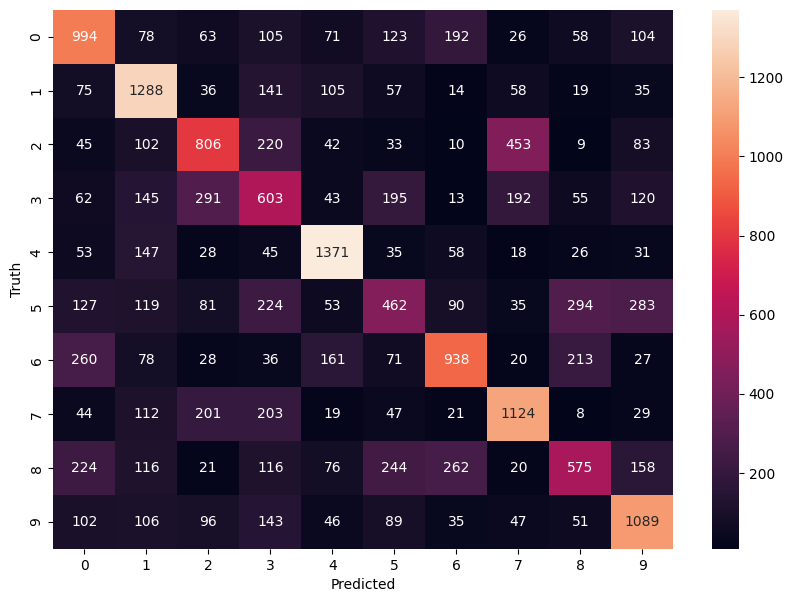

In [328]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test_cat,y_pred_final)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Misclassified images

In [330]:
index = 0
misclassified_images = []
for label, predict in zip(y_test_cat, y_pred_final):
    if label != predict:
        misclassified_images.append(index)
    index +=1
print(misclassified_images)
print(len(misclassified_images))

[0, 6, 7, 8, 10, 11, 14, 15, 18, 19, 23, 25, 26, 27, 29, 36, 37, 40, 45, 46, 51, 57, 62, 67, 68, 71, 75, 77, 78, 79, 80, 83, 84, 88, 89, 90, 92, 93, 96, 97, 100, 102, 109, 111, 114, 120, 127, 128, 132, 134, 137, 138, 140, 141, 142, 144, 145, 148, 149, 150, 151, 152, 154, 155, 158, 159, 163, 165, 166, 167, 170, 173, 175, 176, 177, 178, 180, 182, 184, 185, 186, 188, 190, 191, 194, 195, 200, 202, 203, 207, 210, 213, 217, 219, 220, 222, 223, 224, 227, 228, 229, 232, 233, 235, 239, 240, 241, 244, 251, 252, 253, 254, 258, 261, 266, 267, 268, 270, 272, 274, 275, 278, 279, 280, 281, 284, 285, 286, 287, 289, 290, 297, 298, 299, 301, 302, 303, 304, 305, 306, 307, 310, 311, 313, 323, 324, 326, 330, 337, 341, 342, 346, 347, 348, 349, 351, 353, 354, 355, 358, 360, 363, 364, 366, 368, 370, 371, 372, 374, 376, 377, 378, 382, 383, 384, 388, 389, 390, 396, 398, 399, 400, 401, 402, 403, 404, 407, 408, 413, 415, 417, 418, 420, 423, 425, 426, 428, 429, 432, 434, 436, 437, 438, 440, 441, 442, 443, 446, 448

## Predicting the output

1/1 [==============================] - 0s 37ms/step
Was predicted  3
Was labeled  3
Predicted Probabilities:  [[0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 4.047557e-22]]


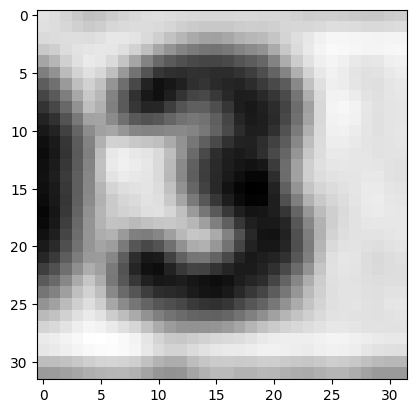

In [331]:
image_index = 445
plt.imshow(X_test[image_index].reshape(32, 32),cmap='Greys')
pred = model2.predict(X_test[image_index].reshape(-1, 1024))
print("Was predicted ",pred.argmax())
print("Was labeled ",y_test_cat[image_index])
print("Predicted Probabilities: ",pred)

1/1 [==============================] - 0s 22ms/step
Was predicted  0
Was labeled  0
Predicted Probabilities:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


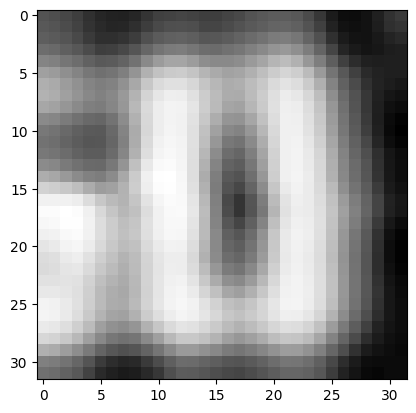

In [332]:
image_index = 613
plt.imshow(X_test[image_index].reshape(32, 32),cmap='Greys')
pred = model2.predict(X_test[image_index].reshape(-1, 1024))
print("Was predicted ",pred.argmax())
print("Was labeled ",y_test_cat[image_index])
print("Predicted Probabilities: ",pred)

### Answer 3 D

###### Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same

In [190]:
#y_test_cat=to_categorical(y_test,num_classes=10)
#y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=10)

### Training Loss versus Validation loss

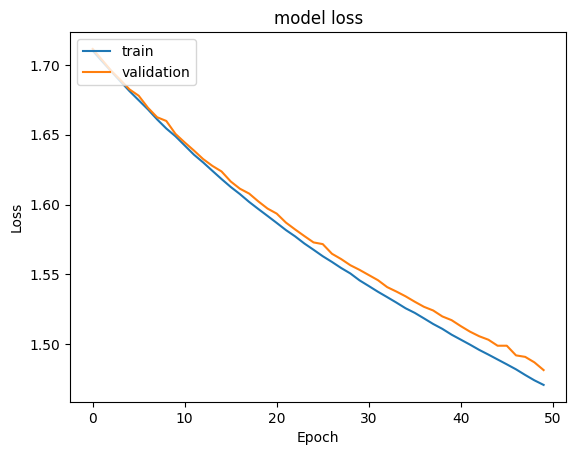

In [333]:
#Plotting Train Loss vs Validation Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Training accuracy versus validation accuracy

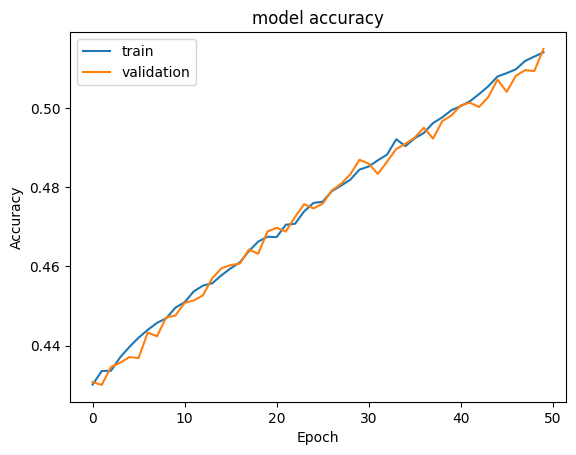

In [334]:
#Plotting Train Loss vs Validation Loss
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observations:
1. From above loss plot, it's evident that EPOCH need to be increased beyond 50 to get to saturation level as loss is still decreasing at EPOCH = 50
2. From above accuracy plot, it's evident that validation data is bit overfit with larer variance than training data. However, both train and validation accuracies are increasing at a rapid pace.